# The Sparks Foundation

## Data Science And Business Analytics GRIPMAY'21

__Author__ : Muhammad Danyal Asim

### Task 01:

#### Statement:
- Predict the percentage of an student based on the no. of study hours.
- This is a simple linear regression task as it involves just 2 variables.
- What will be predicted score if a student studies for 9.25 hrs/ day? 



In [1]:
#importing the libraries
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Reading the data from the csv file from the url given below

Data = pd.read_csv("http://bit.ly/w-data")

In [3]:
#Displaying the first 10 records of the data

Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Displaying the Stastistical details of the data

Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Checking if any null value exists in the dataset

Data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


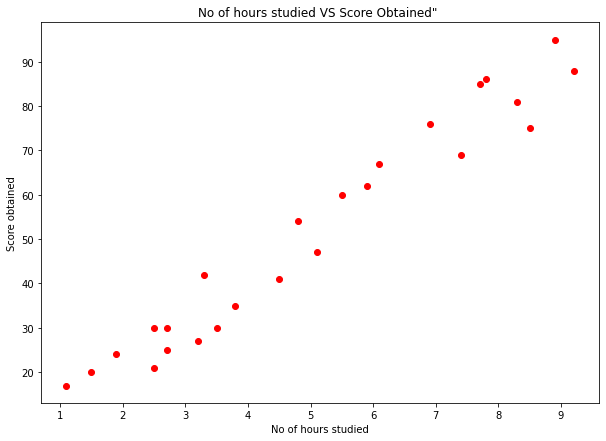

In [6]:
#plotting the scatter plot for the number of hours studied vs the score for better visualiztion and understanding

plt.figure(figsize=(10,7))
plt.scatter(Data.Hours,Data.Scores,color = '#FF0000')
plt.xlabel('No of hours studied')
plt.ylabel('Score obtained')
plt.title('No of hours studied VS Score Obtained" ')
plt.show()

In [19]:
#Separating the Scores and Hours data into seperate one dimensional arrays

Hours=Data.iloc[:,0].values
print(type(Hours))
Hours = Hours.reshape(-1,1)
Scores=Data.iloc[:,1].values
Scores=Scores.reshape(-1,1)


<class 'numpy.ndarray'>


In [20]:
# Splitting the variables into testing and training data

from sklearn.model_selection import train_test_split
Hours_train,Hours_test,Scores_train,Scores_test  = train_test_split (Hours,Scores,test_size = 0.33)

In [21]:
#implenetion the linear regression and fittign the best fit line

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Hours_train,Scores_train)

LinearRegression()

In [22]:
#printing the intercent and coefficient values i.e y = mx + c  m = coefficient and c = intercept

print('Intercept:',model.intercept_)
print ('Coefficient:',model.coef_)


Intercept: [2.27717882]
Coefficient: [[9.96941129]]


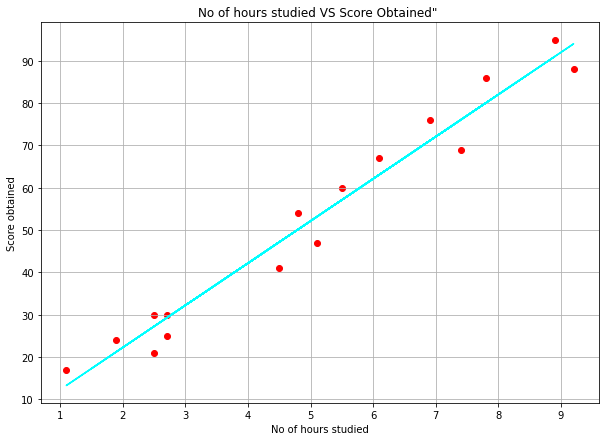

In [23]:
#plotting the scatter plot for the number of hours studied vs the score obtained of the trained data
best_fit_line = model.coef_*Hours + model.intercept_
plt.figure(figsize=(10,7))
plt.scatter(Hours_train,Scores_train,color = '#FF0000')
plt.plot(Hours,best_fit_line,color = '#00FFFF')
plt.xlabel('No of hours studied')
plt.ylabel('Score obtained')
plt.title('No of hours studied VS Score Obtained" ')
plt.grid()
plt.show()

In [24]:
Scores_predicted = model.predict(Hours_test) #predicting the scores


Scores_predicted = Scores_predicted.flatten()
Scores_test= Scores_test.flatten()

In [25]:
# Comparing Actual scores  vs Predicted scores
Scores_Comparison = pd.DataFrame({'Actual Value': Scores_test, 'Predicted Value':Scores_predicted})  
Scores_Comparison

,Actual Value,Predicted Value
0,30,37.170118
1,35,40.160942
2,20,17.231296
3,27,34.179295
4,85,79.041646
5,42,35.176236
6,81,85.023293
7,62,61.096705
8,75,87.017175


In [26]:
#checking the testig accuracy 

from sklearn import metrics
print("accuracy of actual and predicted r-squared : ", metrics.r2_score(Scores_test,Scores_predicted))

accuracy of actual and predicted r-squared :  0.9248681213136966


In [27]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Scores_test,Scores_predicted))
print('Mean Squared Error :',metrics.mean_squared_error(Scores_test,Scores_predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Scores_test,Scores_predicted)))

Mean Absolute Error: 5.77832659155997
Mean Squared Error : 42.30388547067813
Root Mean Squared Error: 6.50414371540775


In [28]:
Hours = 9.25
print('If there are 9.25 hours,then the predicted score is:',model.predict([[Hours]]))

If there are 9.25 hours,then the predicted score is: [[94.49423328]]
